In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
import yfinance as yf

# Get the Stock Code
df = yf.download('MTL.KA', start='2012-01-01', end='2019-12-17')

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,268.415070,280.624420,257.182739,265.792480,169.359482,25944
2012-01-04,265.792480,270.339752,264.462799,268.444458,171.049271,65491
2012-01-05,268.444458,273.160706,266.666656,272.022034,173.328857,25599
2012-01-06,272.022034,276.584015,267.408630,276.113861,175.936142,30440
2012-01-09,276.113861,276.951324,268.172638,275.489441,175.538239,11810
...,...,...,...,...,...,...
2019-12-10,682.000000,682.000000,672.099976,675.669983,579.318787,27700
2019-12-11,675.099976,677.000000,667.000000,670.200012,574.628845,23450
2019-12-12,672.000000,672.000000,660.010010,669.650024,574.157349,110800


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2001, 6)

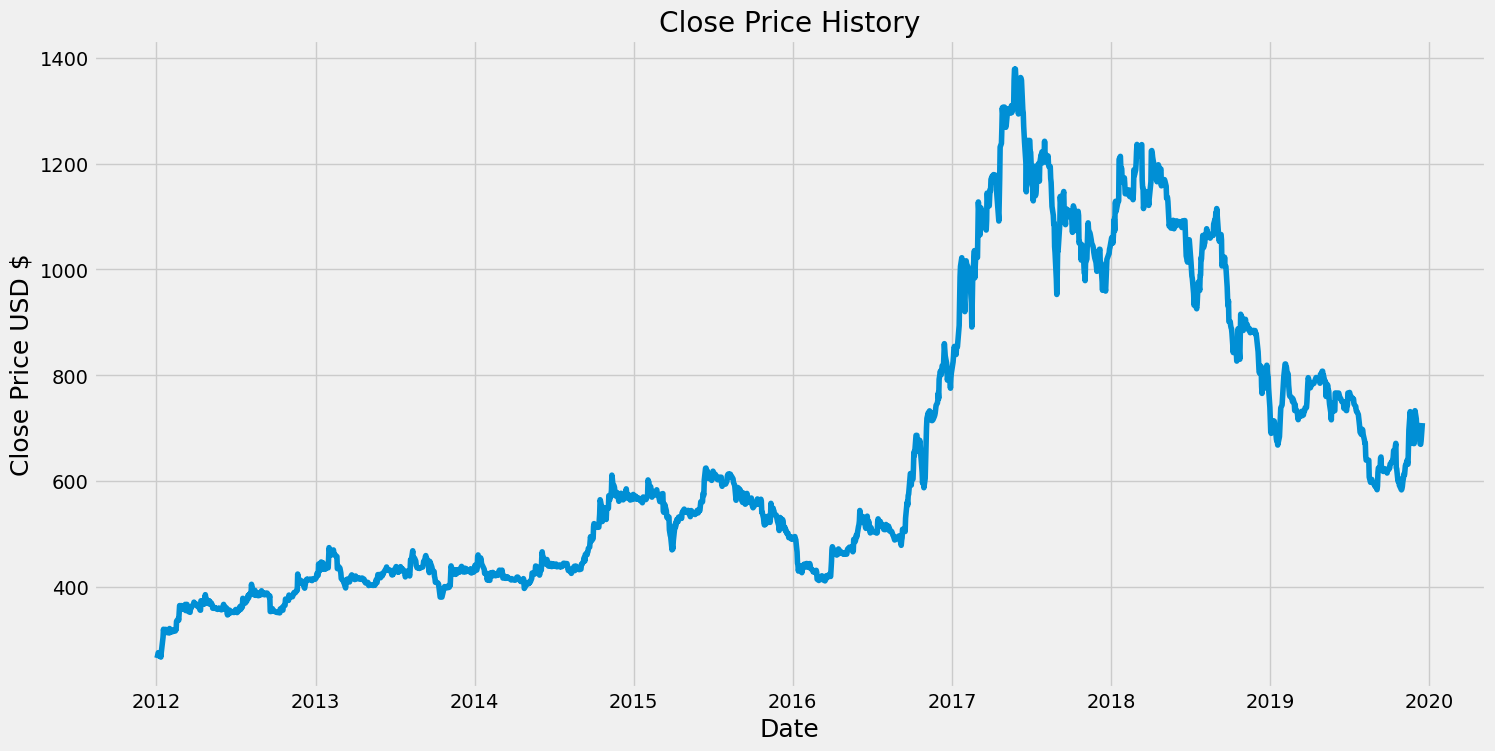

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1601

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00238328],
       [0.00559839],
       ...,
       [0.36293944],
       [0.36869098],
       [0.39906641]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00238328, 0.00559839, 0.00927564, 0.00871448,
       0.00804768, 0.00540693, 0.00177589, 0.00986981, 0.0353531 ,
       0.0490586 , 0.04398177, 0.04680076, 0.04881435, 0.0438035 ,
       0.04465515, 0.04327537, 0.04569825, 0.04369788, 0.04266139,
       0.05029977, 0.04437126, 0.04831921, 0.0452163 , 0.04456933,
       0.04666873, 0.04647067, 0.04790988, 0.04596894, 0.04604154,
       0.04921046, 0.04832579, 0.0626849 , 0.06680449, 0.06427596,
       0.07736749, 0.08925089, 0.08470219, 0.08925089, 0.08423346,
       0.08290647, 0.08356008, 0.08446452, 0.08544822, 0.08713169,
       0.09127109, 0.08064863, 0.09123146, 0.08135503, 0.08055621,
       0.082649  , 0.0788067 , 0.07773721, 0.08462957, 0.08450415,
       0.08793051, 0.08793051, 0.08968663, 0.09078253, 0.09502754])]
[0.09255183409753837]



In [9]:
#Convert hte x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data 
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1541, 60, 1)

In [11]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1541/1541 [==============================] - 74s 43ms/step - loss: 0.0020


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 34ms/step


In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

35.949436810086624

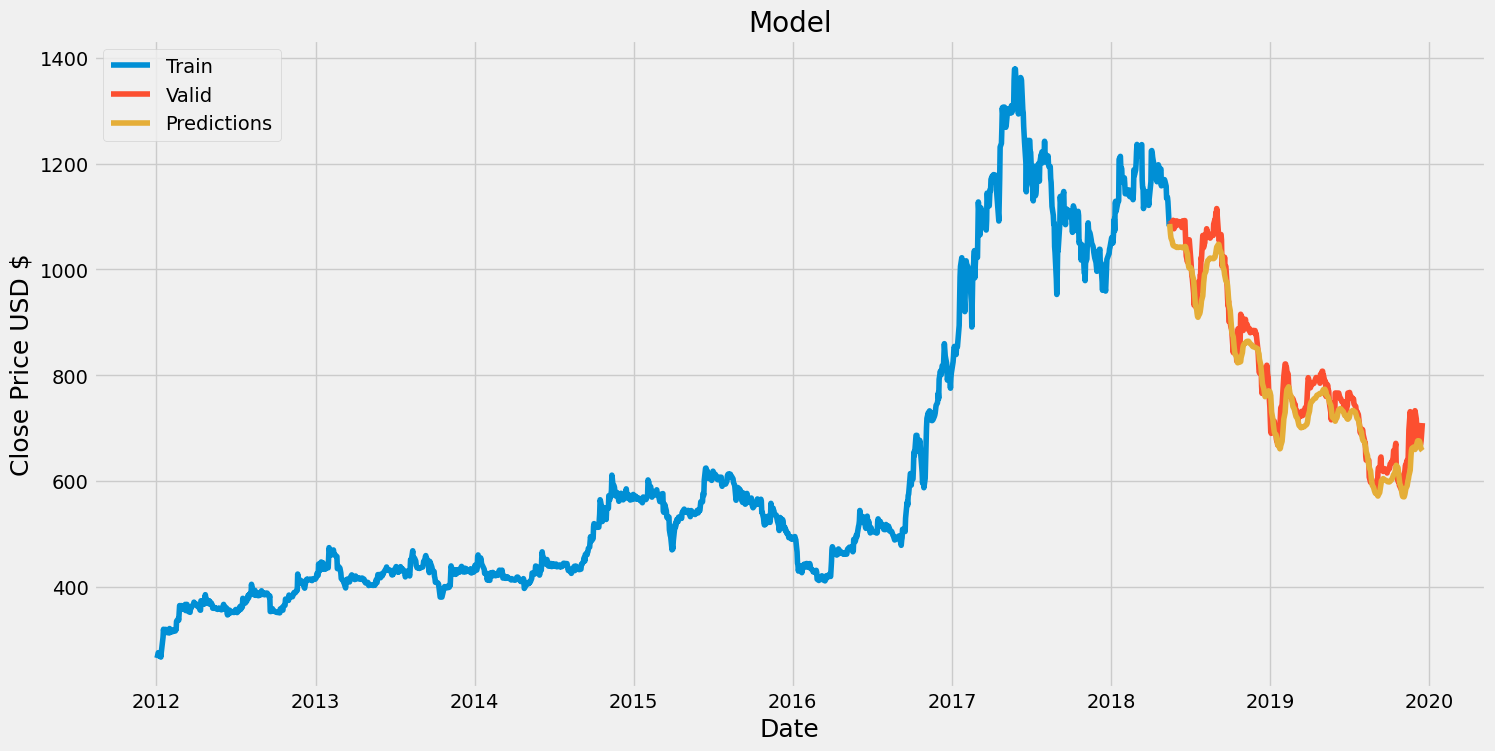

In [20]:
#Plot the data
train = data[:training_data_len]
x_valid = data[training_data_len:]

import pandas as pd

# Assuming you have a column named 'Close' in the 'data' DataFrame
valid = pd.DataFrame()
valid['Close'] = data[training_data_len:]['Close']
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [21]:
#Show the valid predicted price
valid

,Close,Predictions
Date,,
2018-05-15,1085.342163,1085.798218
2018-05-16,1085.342163,1075.742432
2018-05-17,1087.342163,1066.744141
2018-05-18,1078.062256,1059.602783
2018-05-21,1079.866699,1053.108276
...,...,...
2019-12-10,675.669983,673.593872
2019-12-11,670.200012,669.848633
2019-12-12,669.650024,665.281128


In [22]:
#Get the qoute
apple_qoute = df = yf.download('MTL.KA', start='2012-01-01', end='2019-12-17')


import yfinance as yf

# Download the data for the 'MTL.KA' stock from the specified date range
apple_quote = yf.download('MTL.KA', start='2012-01-01', end='2019-12-17')
# Create a new DataFrame with only the 'Close' column
new_df = apple_quote.filter(['Close'])
# Get the last 60 days' closing price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

#Scale the data to be  value between 0 and 1
# Assuming you have defined the 'scaler' object and scaled the 'last_60_days' data
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 47ms/step
[[659.6473]]


In [23]:
import yfinance as yf

# Download the data for the 'MTL.KA' stock from a different date range
apple_quote = yf.download('MTL.KA', start='2019-12-17', end='2019-12-19')

# Continue with the rest of your code using the 'apple_quote' DataFrame
# ...

# Print the 'Close' column
print(apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    701.219971
2019-12-18    696.419983
Name: Close, dtype: float64
